In [ ]:
!pip install texify

In [1]:
import cv2
from pdftolatex.block_detector import segment

img = cv2.imread('test4.png')
bboxes = segment(img, two_col=True, preview=True)

0 1 0.0
0 2 0.0
0 3 0.0
0 4 0.018848829854522454
0 5 0.0
0 6 0.0
0 7 0.0
0 8 0.0
0 9 0.0
0 10 0.0
0 11 0.0
0 12 0.0
0 13 0.0
0 14 0.0
0 15 0.0
0 16 0.0
0 17 0.0
0 18 0.0
0 19 0.0
0 20 0.0
0 21 0.0
0 22 0.0
0 23 0.0
0 24 0.0
0 25 0.0
0 26 0.0
0 27 0.0
0 28 0.0
0 29 0.0
0 30 0.0
0 31 0.0
0 32 0.0
0 33 0.0
0 34 0.0
0 35 0.0
0 36 0.0
0 37 0.0
0 38 0.0
0 39 0.0
0 40 0.0
0 41 0.0
0 42 0.0
0 43 0.0
1 0 0.0
1 2 0.0
1 3 0.0
1 4 0.0
1 5 0.0
1 6 0.0
1 7 0.0
1 8 0.0
1 9 0.0
1 10 0.0
1 11 0.0
1 12 0.0
1 13 0.0
1 14 0.0
1 15 0.0
1 16 0.0
1 17 0.0
1 18 0.0
1 19 0.0
1 20 0.0
1 21 0.0
1 22 0.0
1 23 0.0
1 24 0.0
1 25 0.0
1 26 0.0
1 27 0.0
1 28 0.0
1 29 0.0
1 30 0.0
1 31 0.0
1 32 0.0
1 33 0.0
1 34 0.0
1 35 0.0
1 36 0.0
1 37 0.0
1 38 0.0
1 39 0.0
1 40 0.0
1 41 0.0
1 42 0.0
1 43 0.0
2 0 0.0
2 1 0.0
2 3 0.0
2 4 0.0
2 5 0.0
2 6 0.0
2 7 0.0
2 8 0.0
2 9 0.0
2 10 0.0
2 11 0.0
2 12 0.0
2 13 0.0
2 14 0.0
2 15 0.0
2 16 0.0
2 17 0.0
2 18 0.0
2 19 0.0
2 20 0.0
2 21 0.0
2 22 0.0
2 23 0.0
2 24 0.0
2 25 0.0
2 26 0.0
2 

(1188, 918, 3)
406 166 32 21


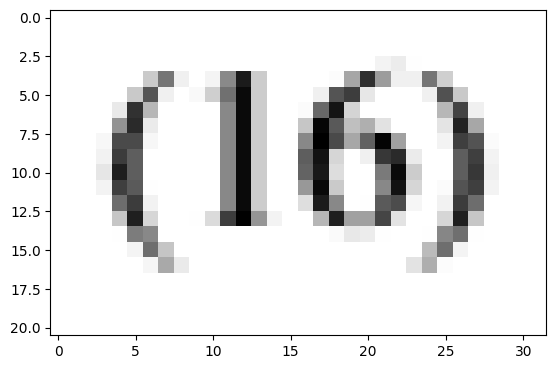

In [4]:
import numpy as np
print(img.shape) 
page_img = cv2.cvtColor(np.asarray(img), cv2.COLOR_RGB2BGR)
box = bboxes[3]
print(box.x, box.y, box.width, box.height)

import matplotlib.pyplot as plt
img_part = page_img[box.y:box.y+box.height, box.x:box.x+box.width, :]
plt.imshow(img_part)
plt.show()

In [5]:
from rapidocr_onnxruntime import RapidOCR

engine = RapidOCR()

# img_path = 'tests/test_files/ch_en_num.jpg'
result, elapse = engine(img_part)
print(result)
print(elapse)

[[[[2.0, 1.3125], [30.0, 1.96875], [30.0, 16.40625], [1.0, 15.75]], '(16)', 0.9721515]]
[0.3277827999991132, 0.002000093460083008, 0.0410008430480957]


In [7]:
result[0][1]

'(16)'

In [ ]:
h, w = page_img.shape[:2]
print(h, w)

w_threshold = w/20 # 宽度小于这个值的block直接用传统ocr识别

1188 918


In [4]:
# import pytesseract

# content = pytesseract.image_to_data(img_part, output_type=pytesseract.Output.DICT)
# " ".join(content['text'])
import os

os.environ["HTTPS_PROXY"] = "http://localhost:7890"
os.environ["HTTP_PROXY"] = "http://localhost:7890"

from texify.inference import batch_inference
from texify.model.model import load_model
from texify.model.processor import load_processor
from PIL import Image

model = load_model()
processor = load_processor()

d:\bin\conda\envs\py310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loaded texify model to cuda with torch.float16 dtype


In [5]:
img = Image.fromarray(img_part)
# img = Image.open("test.png") # Your image name here
results = batch_inference([img], model, processor)
print(results[0])



\begin{tabular}{|c|c|c|} \hline  & $\hat{E}_{\rm f}[\kappa L_{\rm cl}]$ \\  & $\hat{L}^{\rm CP}=\hat{E}_{\rm f}[r_{\rm d}A_{\rm cl}]$ \\  & $\hat{E}_{\rm f}[\exp(r_{\rm r}-1-\varepsilon,1+\varepsilon)A_{\rm f}]$ \\  & $\hat{L}^{\rm CP}=\hat{E}_{\rm f}[\min(r_{\rm d}A_{\rm cl},\,\exp(r_{\rm r},\,1-\varepsilon,1+\varepsilon)A_{\rm f})]$ \\  & $\hat{L}^{\rm CP}=\hat{E}_{\rm f}[\min(r_{\rm d}A_{\rm cl},\,\exp(r_{\rm r},\,1-\varepsilon,1+\varepsilon)A_{\rm f})]$ \\  & $\hat{L}^{\rm CP}=\hat{E}_{\rm f}[\min(r_{\rm d}A_{\rm cl},\,\exp(r_{\rm r},\,1-\varepsilon,1+\varepsilon)A_{


In [ ]:
img = Image.fromarray(img_part)
# img = Image.open("test.png") # Your image name here
results = batch_inference([img], model, processor)
print(results[0])

$${\cal L}^{C P I}(\theta)=\hat{\mathbb{E}}_{t}\bigg[\frac{\pi_{\theta}(a_{t}\mid s_{t})}{\pi_{\theta_{\mathrm{old}}}(a_{t}\mid s_{t})}\hat{A}_{t}\bigg]=\hat{\mathbb{E}}_{t}\Big[r_{t}(\theta)\hat{A}_{t}\Big].$$


39 236 619 69


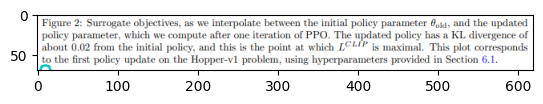

In [6]:
box = bboxes[1]
print(box.x, box.y, box.width, box.height)
img_part = page_img[box.y:box.y+box.height, box.x:box.x+box.width, :]
plt.imshow(img_part)
plt.show()

In [7]:
img = Image.fromarray(img_part)
# img = Image.open("test.png") # Your image name here
results = batch_inference([img], model, processor)
print(results[0])


Figure 2: Surrogate objectives, as we interpolate between the initial policy parameter $\theta_{\text{old}}$, and the updated policy parameter, which we compute after one iteration of PPO. The updated policy has a KL divergence of about 0.02 from the initial policy, and this is the point at which $L^{CLIP}$ is maximal. This plot corresponds to the first policy update on the Hopper-v1 problem, using hyperparameters provided in Section 6.1.



$${\cal L}^{C P I}(\theta)=\hat{\mathbb{E}}_{t}\bigg[\frac{\pi_{\theta}(a_{t}\mid s_{t})}{\pi_{\theta_{\mathrm{old}}}(a_{t}\mid s_{t})}\hat{A}_{t}\bigg]=\hat{\mathbb{E}}_{t}\Big[r_{t}(\theta)\hat{A}_{t}\Big].$$

In [ ]:
print(results[0])

$$\left[L^{C P I}(\theta)={\hat{\mathbb{E}}}_{t}\left[{\frac{\pi_{\theta}(a_{t}\mid s_{t})}{\pi_{\theta_{\mathrm{old}}}(a_{t}\mid s_{t})}}{\hat{A}}_{t}\right]={\hat{\mathbb{E}}}_{t}\left[r_{t}(\theta){\hat{A}}_{t}\right].\right]$$


#### png -> jpg

In [ ]:
from PIL import Image

# 打开PNG图像
png_image = Image.open("doc/pic.png")

# 将图像转换为RGB模式（如果它不是的话）
rgb_image = png_image.convert('RGB')

# 保存为JPG格式
rgb_image.save("doc/detecting_steps.jpg", "JPEG")

print("转换完成！")

转换完成！
